## Advanced Classification Predict

## TeamNM1

   #### - Francis Egah
   #### - Lesego Tiro
   #### - AbdulMu'izz Okunade
   #### - Ruth Favour Ossai
   #### - Michael Benjamin
   #### - Haruna Jibrin 


<a id="cont"></a>

## Table of Contents
<a href=#one2>1. introduction</a>

<a href=#one1>2. Problem statement</a>

<a href=#onei>3. Importing Packages</a>


<a href=#one>4. Loading Data</a>

<a href=#two>5. Exploratory Data Analysis (EDA)</a>

<a href=#three>6. Data Engineering</a>


<a href=#four>7. Modelling</a>

<a href=#five>8. Model Perfomance</a>

<a href=#six>9. Model Explanations</a>

<a href=#seven>10. Conclusion</a>

<a href=#threefiv>11. References</a>

<a href=#threefi>12. kaggle Submissions</a>

<a href=#threefi>13. Saving Models</a>


### Honour Code 


Honour Code
I {TEAM NM1}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code.

Non-compliance with the honour code constitutes a material breach of contract

<a id="one1"></a>
## 1. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

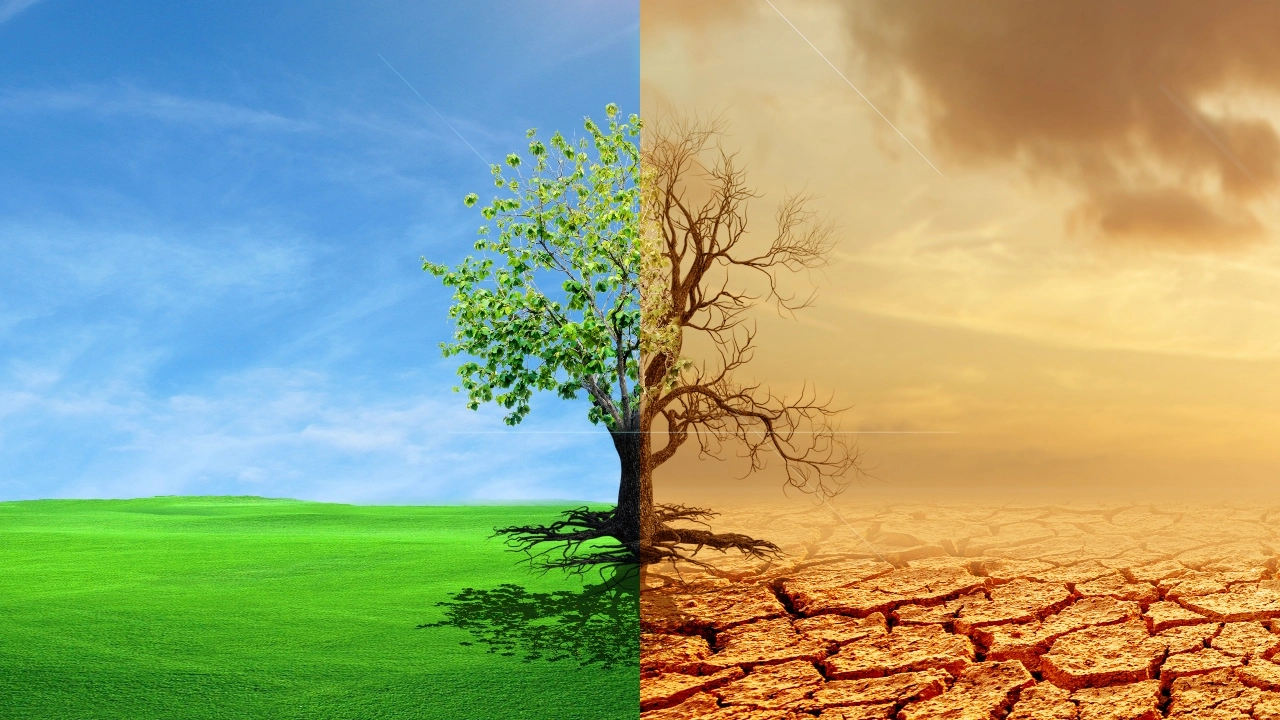

The impacts of climate change are now widely discussed through a variety of mediums. Originating from scientific papers, newspaper articles, and blog posts, a broad spectrum of climate change opinions, subjects, and sentiments exist. Newspaper articles often dismiss or sensationalize the effects of climate change due to journalistic biases including personalization,This is solved by listening to what the people are saying on Social Media platforms. in this case we will be working with twitter.

The world is dealing with a lot of Climate Change issues and companies are expected to operate and contribute to the world's economy without harming the environment while maintaining a low carbon footprint.They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. To archieve such a goal it is neccesary to know how people perceive climate change and whether or not they believe that the repercussions of harming the eco-system are catastrophic or merely just an exageration.This would contribute to the market research efforts in gauging how their product/service may be received by the population.

There are limited places or plartforms for such a study to carried out, so social media is used to gather data and study it to undertand the perspective of millions around the world towards climate change. Twitter posts are used as input and the sentiment of the tweet is used to interpret the the mindset towards climate change for millions around the world. 


<a id="onei"></a>
## 2.  Problem Statement: Twitter Sentiment Classification

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

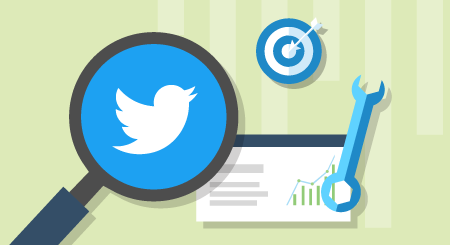

The aim is to design and create a Machine learning Model that is able to classify whether or not a person believes in climate change.Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.Twitter has become a valuable resource for analyzing current events and headline news.

WE are presented with a kaggle Data set consisting of 3 features, namely:

-Sentiment

-Message

-TweetId

We will be engaging in the following:

1. Analyse the given data;
2. Identify potential errors in the data and clean the existing data set;
3. Determine if additional features can be added to enrich the data set;
4. Build models that are capable of forecasting the the sentiment of the Tweet Message;
5. Evaluate the accuracy of the machine learning models;
6. Explain the inner working of the model to a non-technical audience with a presentation

 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
import string
import urllib
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from comet_ml import Experiment

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [5]:
# Load the train and test data

df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test_with_no_labels.csv')

In [6]:
df_train.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Checking the first five rows of the training dataset, we have our labels(sentiment) which includes:

- -1: News
- 0 : pro
- 1 : Neutral
- 2 : Anti

And the message column which entails the tweets 

And the tweet Id which is a unique identification of each tweet.

In [5]:
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [6]:
'''# convert class from numerical to word definition of class
def class_changer(df):
    df = df_train
    word_class = []
    old_class = df['sentiment']
    
    for class_ in old_class:
        if class_ == 2:
            word_class.append('News')
        elif class_ == 1:
            word_class.append('Pro')
        elif class_ == 0:
            word_class.append('Neutral')
        else:
            word_class.append('Anti')
    df['sentiment'] = word_class
    
    return df 
df_train = class_changer(df_train)
df_test = class_changer(df_test)  '''  

"# convert class from numerical to word definition of class\ndef class_changer(df):\n    df = df_train\n    word_class = []\n    old_class = df['sentiment']\n    \n    for class_ in old_class:\n        if class_ == 2:\n            word_class.append('News')\n        elif class_ == 1:\n            word_class.append('Pro')\n        elif class_ == 0:\n            word_class.append('Neutral')\n        else:\n            word_class.append('Anti')\n    df['sentiment'] = word_class\n    \n    return df \ndf_train = class_changer(df_train)\ndf_test = class_changer(df_test)  "

The sentiment Columns is illustrated in a way that a person with no background to the the Dataset will not be able to make sense of it,and this has to be changed to something more readable.
The numbers -1,0,1 and 2 are given more readable sentiment meanings in -1 as 'Anti', 0 as 'Neutral', 1 as 'Pro' and 2 as 'News'. This makes it easier to share this infor'matio with a non-technical audience without any confusion or loss of translation.


In [7]:
df_train['sentiment word'] = df_train.sentiment.apply(lambda x: "News" if x ==2 else"Pro" if x==1 else "Neutral" if x==0 else "Anti")
#df_test['sentiment word'] = df_train.sentiment.apply(lambda x: "News" if x ==2 else"Pro" if x==1 else "Neutral" if x==0 else "Anti")

The train dataset includes all features of the Dataframe.

<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them

### 5.1  The INITIAL INSPECTION AND OBSERVATION OF THE TRAIN DATASET



In [8]:
# train Dataset
df_train.head(100)

sentiment                                            message  tweetid  \
0           1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1           1  It's not like we lack evidence of anthropogeni...   126103   
2           2  RT @RawStory: Researchers say we have three ye...   698562   
3           1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4           1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
..        ...                                                ...      ...   
95          1  RT @RonaldKlain: As Trump decides on Paris, @B...   458845   
96          1  RT @savingoceans: Lack of #climate change acti...   695439   
97          1  “Yet another Trump advisor is clueless on clim...   894382   
98          1  RT @StephenSchlegel: she's thinking about how ...   603318   
99          2  U.S. environmental agency chief says humans co...   554354   

   sentiment word  
0             Pro  
1             Pro  
2            News  
3             Pro  
4             Pro  
..            ...  
95            Pro  
96            Pro  
97            Pro  
98            Pro  
99           News  

[100 rows x 4 columns]

The first five rows and the last five rows of the dataset. This is the dataframe used to train the model.

In [7]:
df_test.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

This is the test Dataset. it doea not have the Sentiment feature which is the the Target variable. This is the dataframe that will be used to make predictions by the Model.

In [10]:
# Columns of the dataset
df_train.columns

Index(['sentiment', 'message', 'tweetid', 'sentiment word'], dtype='object')

These are the columns that make up the dataset 

In [11]:
# Shape of data Set
df_train.shape


(15819, 4)

There are 15,819 observations (tweets) in our dataset across 3 features the label (sentiment), the message (the tweets) and the TweetID (unique ID for each tweet)

In [12]:
# total number of entries in dataset
df_train.size

63276

The dataframe consists of 47457 entries.


In [13]:
#unique values in columns
df_train.nunique()

sentiment             4
message           14229
tweetid           15819
sentiment word        4
dtype: int64

This is the the number of unique values present in each of the three columns that makeup the dataset



### 5.2 Column Datatypes


In [14]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentiment       15819 non-null  int64 
 1   message         15819 non-null  object
 2   tweetid         15819 non-null  int64 
 3   sentiment word  15819 non-null  object
dtypes: int64(2), object(2)
memory usage: 494.5+ KB


The concise summary of the data shows the features in our dataframe, also the number of columns that are not empty and the data types.

- The result shows we have no non-null values, this will be further explored to confirm in details.
- We have 2 of the columns to be of int values and 1 in object (string)

- The dataset runs on 370.9+ kb of the system memory.

In [15]:
# Nullvalues present in each column
df_train.isnull().sum()

sentiment         0
message           0
tweetid           0
sentiment word    0
dtype: int64

As represented above there are no missing values in any of the three feature of the dataset, which means there will not be any neccesary entity replacement in data engineering.


In [16]:
df_train.describe(include='object')

message sentiment word
count                                               15819          15819
unique                                              14229              4
top     RT @StephenSchlegel: she's thinking about how ...            Pro
freq                                                  307           8530

In [17]:
# The most occuring value in sentiment
df_train['sentiment'].mode()

0    1
Name: sentiment, dtype: int64

The most occuring value in the sentiment column is '1', this is referred to as the mode.

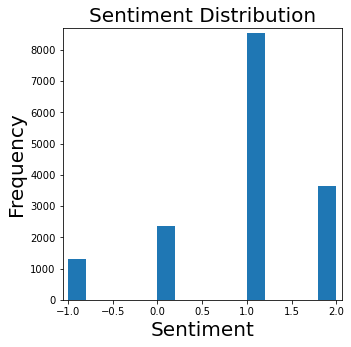

In [18]:
plt.figure(figsize=(5,5))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=10)
plt.hist(df_train['sentiment'], bins=15)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

The visual clearly indicates that sentiment 1(Neutral) occurs way more in the sentiment column than 0(pro),-1(News) and 2(Anti). This is the mode.

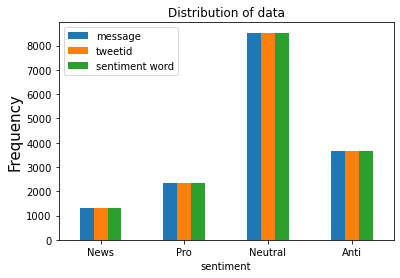

In [19]:
# Plotting the distribution for dataset.
ax = df_train.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=True)
ax.set_xticklabels(['News','Pro', 'Neutral', 'Anti'], rotation=0)
plt.ylabel('Frequency', fontsize=15)
#ax.set_yticklabels(['Count'], rotation=90)
# Storing data in lists.
text, sentiment = list(df_train['message']), list(df_train['sentiment'])

This illustrates the sentiment entities in the dataset in a more understandable sense, the sentiment values are given meaning with -1 as News, 0 as Pro, 1 as Neutral and 2 as Anti. and the visual clearly shows on how each TweetiD is tied to a tweet Message. 

In [20]:
def univariant_analysis(df):
    """
    This is used to provide grphical information of univariant anlysis on the numeric data type
    it plots the density suplots and the histogram
    """
    features = ['sentiment', 'tweetid'] 
    df[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));
    df[features].hist(figsize=(10,5))
    return features

['sentiment', 'tweetid']

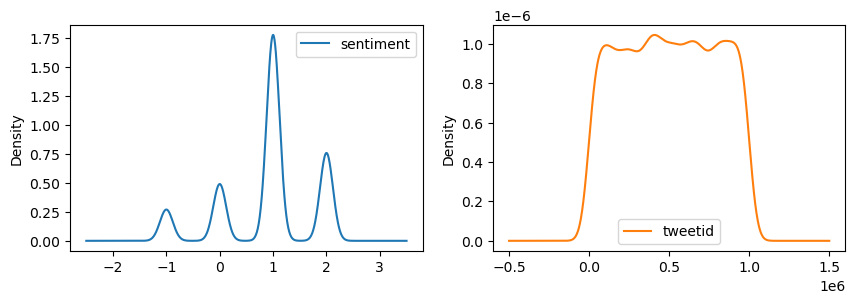

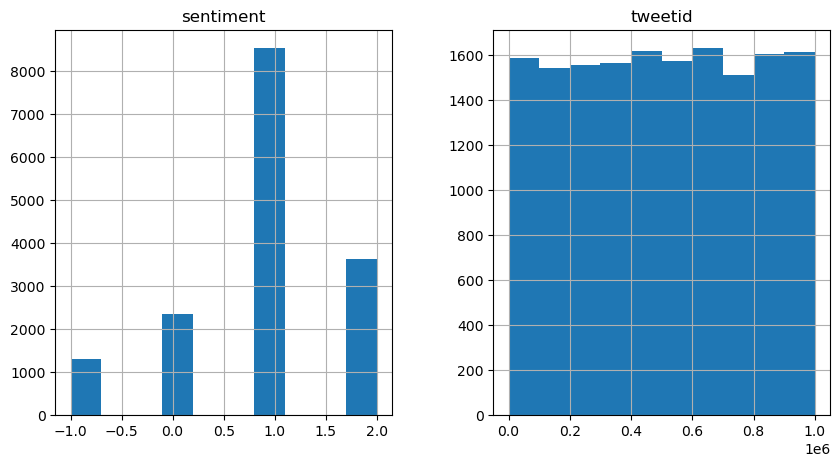

In [9]:
univariant_analysis(df_train)

The above Diagram shows a Density and a Histogram plot of the Distribution of data for the Sentiment and TweetiD features

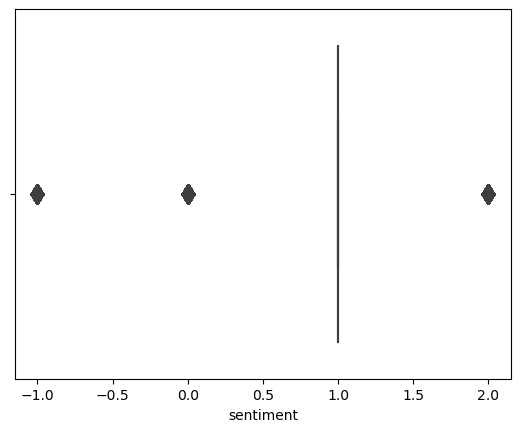

In [10]:
# Boxplot of sentiment column
sns.boxplot(x='sentiment', data=df_train, fliersize=(10));

A Box plot of the Sentiment column of the dataset. The distribution slightly skews to the right, which means the mean is larger than the median. The diagram does not show any presence of outliers in the data feature  

In [11]:
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

Opps! This is an unbalanced dataset. What is the implication of this?

Text(0, 0.5, 'Frequency')

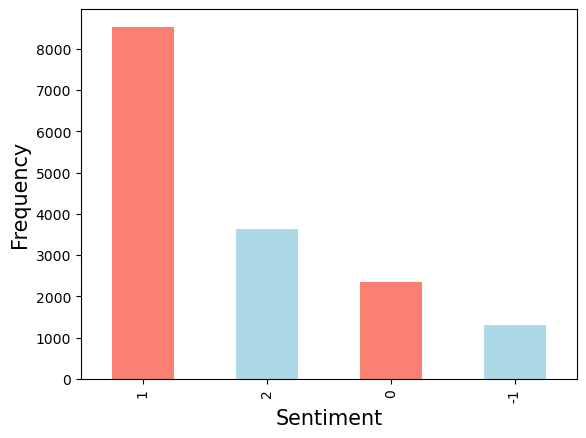

In [14]:
# Lets find out how many of each class there are
df_train["sentiment"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

This shows the difference in occurrence of the different Sentiments in the feature. 1 is clearly outlined as the most occurring in the column 

In [15]:
df_train.groupby('sentiment').describe()

tweetid                                                             \
            count           mean            std     min        25%       50%   
sentiment                                                                      
-1         1296.0  499169.447531  289509.003781  1422.0  243479.25  494572.0   
 0         2353.0  496550.249894  286519.834520   229.0  250733.00  483496.0   
 1         8530.0  507418.550762  289537.581404     6.0  257622.75  511867.5   
 2         3640.0  492613.500275  289163.550697    86.0  246628.25  490980.0   

                                
                 75%       max  
sentiment                       
-1         759714.75  999537.0  
 0         734897.00  999888.0  
 1         761983.50  999698.0  
 2         738188.50  999236.0

In [16]:

def correlation(df):
    """
    This function visualizes the correlation between the sentiment and tweeid
    """
    df.corr()
    corr_matrix = df.corr()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
    return corr_matrix

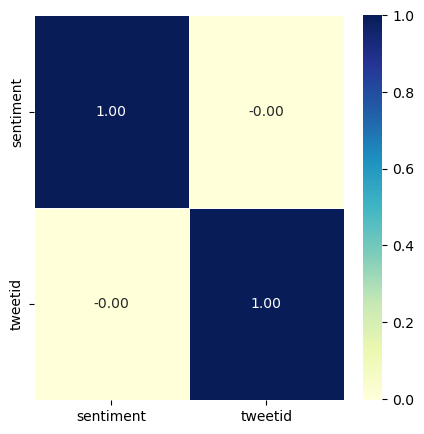

In [17]:
correlation(df_train);

A Heatmap outlines the relationship between features and as it shows in the figure above, there is no presence of any correlation between the feature os the dataset

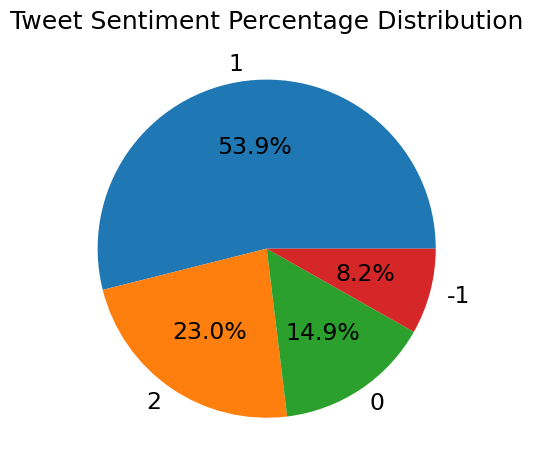

In [19]:
# Visualising the percentage distribution of sentiments
plt.pie(df_train.sentiment.value_counts().values, 
        labels = df_train.sentiment.value_counts().index, 
        autopct = '%2.1f%%', textprops={'fontsize': 17})
plt.title('Tweet Sentiment Percentage Distribution', fontsize=18)
plt.tight_layout()
plt.show()

This is the visualisation of the percentage distribution of sentiments.

<a id="four"></a>
## 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Data engineering helps make data more useful and accessible for consumers of data. To do so, data engineering must source, transform and analyze data from each system. It refers to the building of systems to enable the collection and usage of data. This data is usually used to enable subsequent analysis and data science; which often involves machine learning

**Vectorizing train data**

In [20]:
vecti = CountVectorizer()
X_count = vecti.fit_transform(df_train['message'].values.astype(str))

This converts a collection of text documents to a matrix of token counts. This implementation produces a sparse representation of the counts using scipy.

In [21]:
X_count.shape

(15819, 31905)

In [22]:
vect_20 = CountVectorizer(lowercase=True, stop_words='english', max_features=20000,analyzer='word', ngram_range=(1, 3))
X_count = vect_20.fit_transform(df_train['message'].values.astype(str))

In [23]:
# Run this line to see feature names
vect_20.get_feature_names()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000 000',
 '000 000 000',
 '000 000 year',
 '000 people',
 '000 year',
 '000 year research',
 '000 years',
 '000 years climate',
 '0wvubdxuqu',
 '10',
 '10 9c',
 '10 9c natgeochannel',
 '10 biggest',
 '10 years',
 '100',
 '100 billion',
 '100 billion dollars',
 '100 countries',
 '100 countries https',
 '100 days',
 '100 dead',
 '100 dead winter',
 '100 renewable',
 '100 solutions',
 '100 year',
 '100 years',
 '1000',
 '105',
 '11',
 '11 terrifying',
 '11 terrifying climate',
 '110',
 '115',
 '12',
 '12 globalgoals',
 '12 globalgoals directly',
 '12 science',
 '12 science standards',
 '12 years',
 '125',
 '125 mins',
 '125 mins clinton',
 '13',
 '13 year',
 '13 year old',
 '14',
 '15',
 '15 trillion',
 '15 years',
 '150',
 '150 million',
 '150 years',
 '150 years global',
 '16',
 '16 year',
 '17',
 '17 climate',
 '17 climate change',
 '17 states',
 '170',
 '170 billion',
 '170 billion launching',
 '175',
 '18',
 '19',
 '19 house',
 '19 house republicans',
 '19 trillion'

In [24]:
# Checking shape again
X_count.shape

(15819, 20000)

#### Splitting X and y values

In [25]:
X=X_count.toarray()
y=df_train.sentiment

#### Creating train and validation data set

In [26]:
# Separating the 80% data for training data and 20% for testing data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 20, random_state =42)

<a id="five"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Splitting the data into features and labels

Having splited our data into training and val sets, we can go ahead to build a machine learning model.

The model will trained(find the patterns) on the training set.

And evaluate it(use the patterns) first on the val set as created initially

This will be done using 5 different machine learning models:

1. Logistic Regression
2. Naive-Bayes MultiNomial NB
3. Support Vector Machines
4. DecisionTreeClassifier
5. Random Forest Classifier

#### Fitting and Scoring Models

Using a python function, the models are fitted and validated using the validation data set to find the best model in the bunch.
The models are scored using the evaluation metric `f1_score`.

In [27]:
# Creating a dictionary for the models starting with Linear Regression
models ={"Logistic Regression": LogisticRegression(),
        "Random_Forest": RandomForestClassifier(n_jobs=-1,random_state=42),
        "Naive_Bayes_1": MultinomialNB(),
        "Naive_Bayes_2": BernoulliNB(),
        "Classi_Decision_tree": DecisionTreeClassifier(max_depth=2,random_state=42)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data 
    X_val: val deata (for testing, no labels)
    y_tain: training labels
    y_test val labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_val)
        model_scores[name] = f1_score(y_val, y_pred, pos_label='positive',
                                           average='micro')
    return model_scores

In [28]:
#### Checking model scores
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label

{'Logistic Regression': 0.85,
 'Random_Forest': 0.65,
 'Naive_Bayes_1': 0.7,
 'Naive_Bayes_2': 0.7,
 'Classi_Decision_tree': 0.5}

#### Comparing base models performance

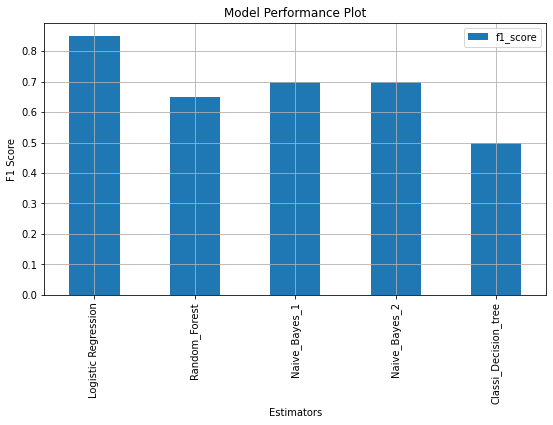

In [29]:
# Compare model performance
model_compare = pd.DataFrame(model_scores, index=["f1_score"])
model_compare.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("F1 Score")
plt.grid()

#### Make predictions on test dataset

We will use the Naive_Bayes_2 model which is the best performing model according th `f1_score` report to predict the `sentiment` for the test dataset `df_test` provided. The predictions made with the model will be submitted as the **submission_file** on Kaggle competition website

In [30]:
# Checking test data set
df_test.head()

message  tweetid sentiment word
0  Europe will now be looking to China to make su...   169760            Pro
1  Combine this with the polling of staffers re c...    35326            Pro
2  The scary, unimpeachable evidence that climate...   224985           News
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263            Pro
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928            Pro

### Preprocessing test data set

In this section, we going to create a function to get the test datset in same format as our training dataset. A function is appllied so it can be repeated across any dataset provided. The function will take the dataset and process it to return in the same fortmat as training set

In [31]:
# Applying the vectorizer on test data
xt = df_test["message"]
vect_mess = vect_20.transform(xt)

vect_mess    

<10546x20000 sparse matrix of type '<class 'numpy.int64'>'
	with 184183 stored elements in Compressed Sparse Row format>

#### Predicting preprocessed test data

In [32]:
# Making predictions on df_test using Naive_bayes_2
model_list = list(models.values())
model_list

[LogisticRegression(),
 RandomForestClassifier(n_jobs=-1, random_state=42),
 MultinomialNB(),
 BernoulliNB(),
 DecisionTreeClassifier(max_depth=2, random_state=42)]

In [33]:
preds = model_list[0].predict(vect_mess)
preds

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

#### Creating submission file for Kaggle using base model

In [34]:
# Converting the prediction to DataFrame
d1=pd.DataFrame(preds, columns=["sentiment"])
d1.head()

sentiment
0          1
1          1
2          1
3          1
4          0

In [35]:
d_2 = pd.DataFrame({"tweetid": df_test["tweetid"]})
d1_submission = d_2.join(d1)
d1_submission.head()

tweetid  sentiment
0   169760          1
1    35326          1
2   224985          1
3   476263          1
4   872928          0

In [36]:
d1_submission.to_csv(r"C:\Users\USER\Desktop\adv_classi_notrbook\TeamNM1-Classification-\d1_submission.csv", index=False)

<a id="six"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In this section, the different models used to train the model will be compared and  the best one amongst them is selected to perform hyperparameter tuning on.

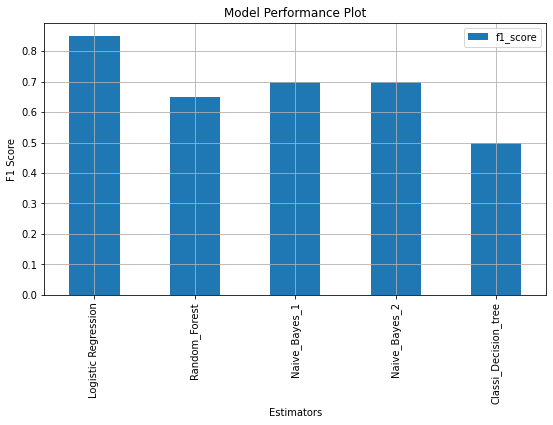

In [37]:
# Compare model performance
model_compare = pd.DataFrame(model_scores, index=["f1_score"])
model_compare.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("F1 Score")
plt.grid()

#### Hyperparameter tuning with RandomizedSearchCV

Hyperparameter tuning is choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins

In [38]:
# Obtaining list of models used
model_lists = list(models.values())
model_lists

[LogisticRegression(),
 RandomForestClassifier(n_jobs=-1, random_state=42),
 MultinomialNB(),
 BernoulliNB(),
 DecisionTreeClassifier(max_depth=2, random_state=42)]

We will be tuning the parameters of the LogisticRegression() model to find the ideal parameters

In [53]:
%%time


# Different logistic regression hyperparameters
log_reg = model_lists[0]
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Instantiate RandomizedSearcgCV model 
rs_model = RandomizedSearchCV(model_lists[0],
                             param_distributions=log_reg_grid,
                             n_iter=1,
                             cv=5,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CPU times: total: 3min 5s
Wall time: 5min 1s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
# Find the best model hyperparameters
rs_model.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [41]:
rs_model.score(X_val, y_val)

0.45

In [42]:
y_predicty = rs_model.predict(X_val)

In [44]:
f1_score(y_val, y_predicty, pos_label='positive',
                                           average='micro')

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


0.45

### Comet Experinments

Comet.ml is a powerful tool for machine learning in production. It enables easy integration with multiple programming languages and frameworks, pipelined experiments, dynamic visualization, and project sharing and management within a team.

##### Setting up API Key 

In [46]:
# Setting the API key (saved as environment variable)
experiment = Experiment(api_key='MensLWBUC6cZMIY7UXmQ0Eev5',
                        project_name="tweet-classification", workspace="egah1111") 

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/egah1111/tweet-classification/f406682ff7994b398d24467dc769236d



In [52]:
# Saving metric to add to a dictionary for logging
y_pred = model_list[0].predict(X_val)
f1 = f1_score(y_val, y_pred, average="micro")
f1

0.85

In [54]:
# Create dictionaries for the data we want to log

params = {"random_state": 42,
          "model_type": "log_reg",
          "scaler": "standard scaler",
          "param_grid": str(log_reg_grid),
          "stratify": True
          }
metrics = {"f1": f1
           }

In [55]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

## Display  

Running `experiment.display()` will show the experiments comet.ml page inside the notebook as illustrated below. 

In [56]:
# Showing experiments
experiment.display()

<a id="seven"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Logistic Regression

Naive-Bayes MultiNomial NB

Support Vector Machines

DecisionTreeClassifier

Random Forest Classifier

### Logistics Regression

**Logistic Regression:** Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lies between 0 and 1.
Logistic Regression is much similar to Linear Regression except for how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
<img
src = 'https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png'>

### Naive-Bayes MultiNomial NB

Naive-Bayes MultiNominal NB: Naïve Bayes — a probabilistic approach for constructing the data classification models. It’s formulated as several methods, widely used as an alternative to the distance-based K-Means clustering and decision tree forests, and deals with probability as the “likelihood” that data belongs to a specific class. The Gaussian and Multinomial models of the naïve Bayes exist. The multinomial model provides an ability to classify data, that cannot be represented numerically. Its main advantage is the significantly reduced complexity. It provides an ability to perform the classification, using small training sets, not requiring to be continuously re-trained.(Arthur v. 2021)

### Support Vector Machines

Support Vector Machines: The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points. To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence (Rohith Gandhi 2018).
<img
src = 'https://miro.medium.com/max/1400/1*ZpkLQf2FNfzfH4HXeMw4MQ.webp'>

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. It becomes difficult to imagine when the number of features exceeds 3.

### DecisionTreeClassifier

Decision Tree Classifier: Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. The decisions or the test are performed on the basis of features of the given dataset. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
<img
src = 'https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png'>

### Random Forest Classifier

Random Forest Classifier: Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

It works in four steps:

Select random samples from a given dataset.

Construct a decision tree for each sample and get a prediction result from each decision tree.

Perform a vote for each predicted result.

Select the prediction result with the most votes as the final prediction.

<img
src = 'http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg' >

<a id="threefiv"></a>

## 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

<a id="threefi"></a>

## 11. References
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

1. Kurtis Pykes Exploratory Data Analysis: EDA For Categorical Data(Apr 15): https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65

 2. 11 Essential Code Blocks for Complete EDA (Exploratory Data Analysis): https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html

3. Data engineering : https://en.wikipedia.org/wiki/Data_engineering


4. What Is Data Engineering? Responsibilities & Tools : https://www.dremio.com/resources/guides/data-engineering/"

5. logistic regression By George LawtonEd BurnsLinda Rosencrance: https://www.techtarget.com/searchbusinessanalytics/definition/logistic-regression

6. What is logistic regression?: https://www.ibm.com/za-en/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.

7. Multinomial Naїve Bayes’ For Documents Classification and Natural Language Processing (NLP),Arthur V. Ratz
May 17, 2021: https://towardsdatascience.com/multinomial-naïve-bayes-for-documents-classification-and-natural-language-processing-nlp-e08cc848ce6

8. Support Vector Machine Algorithm, Article Contributed By aswathisasidharan
: https://www.geeksforgeeks.org/support-vector-machine-algorithm/

 <a id="threef"></a>

## 12.  Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

In [ ]:
df_test['sentiment'] = LRmodel.predict(dx)

In [ ]:
load = df_test[['tweetid', 'sentiment']]
load.to_csv('sample_submission_climate.csv', index = False)
load

<a id="threeif"></a>

## 13. Saving the Models
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>